## Problem Statement

### The goal is to build 2 classification Machine learning models that accurately predicts whether an individual is likely to have heart disease based on diagnostic measurements.

### Dataset Description
#### Dataset: Cardiovascular_Disease Database
#### Size: 1000 samples, 13 features, 1 target

### Features:
#### 1.  patientid             - Patient Identification Number (numeric number)
#### 2.  age                   - Age (Numeric In Years)
#### 3.  gender                - Gender (0-female) / 1-male)
#### 4.  chestpain             - Chest Pain Type (0-typical angina, 1-atypical angina, 2-non-anginal pain, 3-asymptomatic)
#### 5.  restingBP             - Resting blood pressure (94-200 (in mm HG))
#### 6.  serumcholestrol       - Serum cholesterol (126-564 (in mg/dl))
#### 7.  fastingbloodsugar     - Fasting blood sugar (0-false / 1-true. > 120 mg/dl)
#### 8.  restingrelectro       - Resting electrocardiogram results (0-normal, 1-ST-T wave abnormality, 2-probable or definite left ventricular hypertrophy)
#### 9.  maxheartrate          - Maximum heart rate achieved (71-202)
#### 10. exerciseangia         - Exercise induced angina (0-no / 1-yes)
#### 11. oldpeak               - Oldpeak = ST (0-6.2)
#### 12. slope                 - Slope of the peak exercise ST segment (1-upsloping, 2-flat, 3-downsloping)
#### 13. noofmajorvessels      - Number of major vessels (0, 1, 2, 3)
#### 14. target                - Classification (0-Absence of Heart Disease, 1-Presence of Heart Disease)


### Target:
#### 0 = Absence of Heart Disease
#### 1 = Presence of Heart Disease

### Type of Problem
#### This is a Supervised Learning problem — specifically a Binary Classification task — where we want to predict if someone has Heart Disease. we will be using the below algorithms to build and test the prediction model.
#### 1) Logistic Regression,
#### 2) Random Forest

### Evaluation Metrics
#### Since it's a medical problem (false negatives can be dangerous), use:
#### • Accuracy
#### • Precision, Recall, F1-score

## Problem Statement

### The goal is to build 2 classification Machine learning models that accurately predicts whether an individual is likely to have heart disease based on diagnostic measurements.

### Dataset Description
#### Dataset: Cardiovascular_Disease Database
#### Size: 1000 samples, 13 features, 1 target

### Features:
#### 1.  patientid             - Patient Identification Number (numeric number)
#### 2.  age                   - Age (Numeric In Years)
#### 3.  gender                - Gender (0-female) / 1-male)
#### 4.  chestpain             - Chest Pain Type (0-typical angina, 1-atypical angina, 2-non-anginal pain, 3-asymptomatic)
#### 5.  restingBP             - Resting blood pressure (94-200 (in mm HG))
#### 6.  serumcholestrol       - Serum cholesterol (126-564 (in mg/dl))
#### 7.  fastingbloodsugar     - Fasting blood sugar (0-false / 1-true. > 120 mg/dl)
#### 8.  restingrelectro       - Resting electrocardiogram results (0-normal, 1-ST-T wave abnormality, 2-probable or definite left ventricular hypertrophy)
#### 9.  maxheartrate          - Maximum heart rate achieved (71-202)
#### 10. exerciseangia         - Exercise induced angina (0-no / 1-yes)
#### 11. oldpeak               - Oldpeak = ST (0-6.2)
#### 12. slope                 - Slope of the peak exercise ST segment (1-upsloping, 2-flat, 3-downsloping)
#### 13. noofmajorvessels      - Number of major vessels (0, 1, 2, 3)
#### 14. target                - Classification (0-Absence of Heart Disease, 1-Presence of Heart Disease)


### Target:
#### 0 = Absence of Heart Disease
#### 1 = Presence of Heart Disease

### Type of Problem
#### This is a Supervised Learning problem — specifically a Binary Classification task — where we want to predict if someone has Heart Disease. we will be using the below algorithms to build and test the prediction model.
#### 1) Logistic Regression,
#### 2) Random Forest

### Evaluation Metrics
#### Since it's a medical problem (false negatives can be dangerous), use:
#### • Accuracy
#### • Precision, Recall, F1-score

### Load Data and explore Basic Statistics & Structure of dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve, RocCurveDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, precision_recall_curve, PrecisionRecallDisplay

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Load the dataset
file_path = "data/Team2Dataset.csv"
df = pd.read_csv(file_path)

# Drop patientid
# - patientid is just an identifier (like a serial number).
# - It has no relationship with the patient’s cardiovascular condition.

if "patientid" in df.columns:
    df.drop("patientid", axis=1, inplace=True)

# Explore Basic Statistics & Structure of dataset
# View dimension of data source no of row and column
print('Shape:',df.shape)

#View Type
print('Types:')
print(df.dtypes)

# Descriptions of features
print('\nSummary of features:')
print(df.describe())

# View sample of dataset
print('\nInfo:')
print(df.info)



Shape: (1000, 13)
Types:
age                    int64
gender                 int64
chestpain              int64
restingBP              int64
serumcholestrol        int64
fastingbloodsugar      int64
restingrelectro        int64
maxheartrate           int64
exerciseangia          int64
oldpeak              float64
slope                  int64
noofmajorvessels       int64
target                 int64
dtype: object

Summary of features:
              age       gender    chestpain    restingBP  serumcholestrol  \
count  1000.00000  1000.000000  1000.000000  1000.000000      1000.000000   
mean     49.24200     0.765000     0.980000   151.747000       311.447000   
std      17.86473     0.424211     0.953157    29.965228       132.443801   
min      20.00000     0.000000     0.000000    94.000000         0.000000   
25%      34.00000     1.000000     0.000000   129.000000       235.750000   
50%      49.00000     1.000000     1.000000   147.000000       318.000000   
75%      64.25000     1

### Data Quality Check

In [3]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Check for zeros in numerical columns where they might not make sense
print("\nCount of zeros in columns where zero might be suspicious:")
zero_check_cols = ['age', 'restingBP', 'serumcholestrol', 'maxheartrate','slope']
for col in zero_check_cols:
    zero_count = (df[col] == 0).sum()
    print(f"{col}: {zero_count} zeros")

# Replace zeros with NaN for better analysis
df[zero_check_cols] = df[zero_check_cols].replace(0, np.nan)

Missing values per column:
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

Number of duplicate rows: 0

Count of zeros in columns where zero might be suspicious:
age: 0 zeros
restingBP: 0 zeros
serumcholestrol: 53 zeros
maxheartrate: 0 zeros
slope: 180 zeros


In [4]:
# impute serumcholesterol with median
# Impute missing values

print(df.info)
# Fill missing values with median which is more robust to outlier than mean
df.fillna(df.median(), inplace=True)
print(df.info)

<bound method DataFrame.info of      age  gender  chestpain  restingBP  serumcholestrol  fastingbloodsugar  \
0     53       1          2        171              NaN                  0   
1     40       1          0         94            229.0                  0   
2     49       1          2        133            142.0                  0   
3     43       1          0        138            295.0                  1   
4     31       1          1        199              NaN                  0   
..   ...     ...        ...        ...              ...                ...   
995   48       1          2        139            349.0                  0   
996   47       1          3        143            258.0                  1   
997   69       1          0        156            434.0                  1   
998   45       1          1        186            417.0                  0   
999   25       1          0        158            270.0                  0   

     restingrelectro  maxheartr

In [5]:
# To check the data consistency for categorical features
print('gender: ', df['gender'].unique(), "\n")
print('chestpain: ', df['chestpain'].unique(), "\n")
print('restingrelectro: ', df['restingrelectro'].unique(), "\n")
print('fastingbloodsugar : ', df['fastingbloodsugar'].unique(), "\n")
print('exerciseangia: ', df['exerciseangia'].unique(), "\n")
print('slope: ', df['slope'].unique(), "\n")
print('noofmajorvessels: ', df['noofmajorvessels'].unique(), "\n")
print('target: ', df['target'].unique(), "\n")

gender:  [1 0] 

chestpain:  [2 0 1 3] 

restingrelectro:  [1 0 2] 

fastingbloodsugar :  [0 1] 

exerciseangia:  [0 1] 

slope:  [3. 1. 2.] 

noofmajorvessels:  [3 1 0 2] 

target:  [1 0] 



### Observations:

#### 1. Missing Values
#### - The dataset appears complete with no null entries, which is excellent for analysis.
#### - However, zeros in serumcholestrol (cholesterol) represent missing data as cholesterol = 0 is biologically implausible, will be replaced with NaN and imputed with median.
#### 2. Duplicate Rows
#### - No duplicate rows, no action needed
#### 3. Data Consistency
#### - The values for the categorical features all within the expected value, no inconsistencies.

### Univariate Analysis
#### - To see the distribtion of each feature
#### Numerical Variables

In [6]:
# impute missing values for serumcholesterol with median
df.fillna(df.median(), inplace=True)
print(df.info)

<bound method DataFrame.info of      age  gender  chestpain  restingBP  serumcholestrol  fastingbloodsugar  \
0     53       1          2        171            326.0                  0   
1     40       1          0         94            229.0                  0   
2     49       1          2        133            142.0                  0   
3     43       1          0        138            295.0                  1   
4     31       1          1        199            326.0                  0   
..   ...     ...        ...        ...              ...                ...   
995   48       1          2        139            349.0                  0   
996   47       1          3        143            258.0                  1   
997   69       1          0        156            434.0                  1   
998   45       1          1        186            417.0                  0   
999   25       1          0        158            270.0                  0   

     restingrelectro  maxheartr

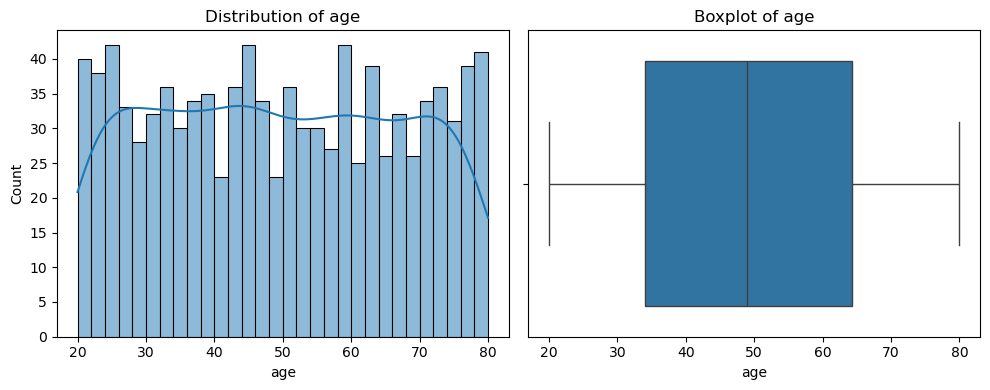


Statistics for age:
Skewness: 0.03
Kurtosis: -1.22


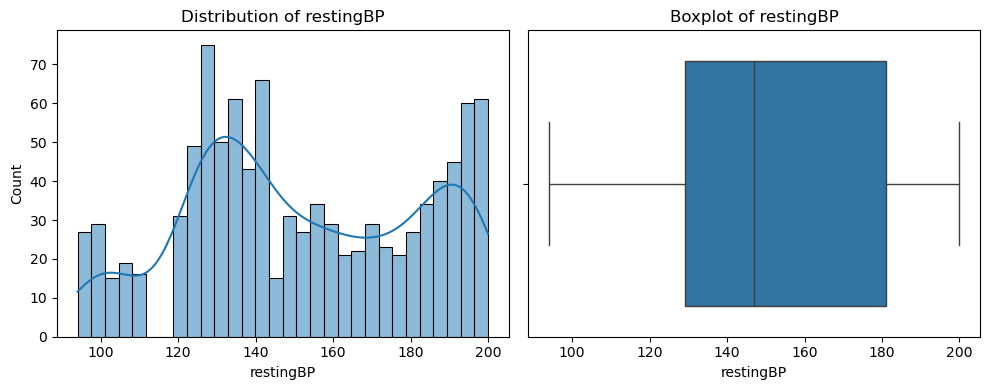


Statistics for restingBP:
Skewness: 0.02
Kurtosis: -1.10


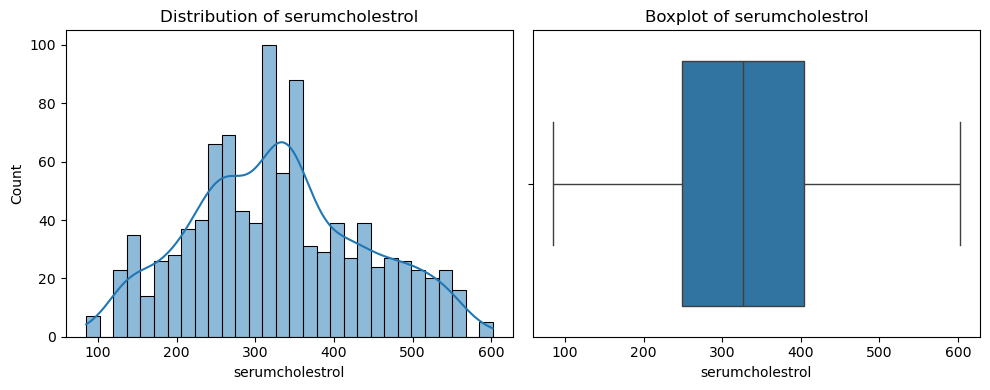


Statistics for serumcholestrol:
Skewness: 0.19
Kurtosis: -0.53


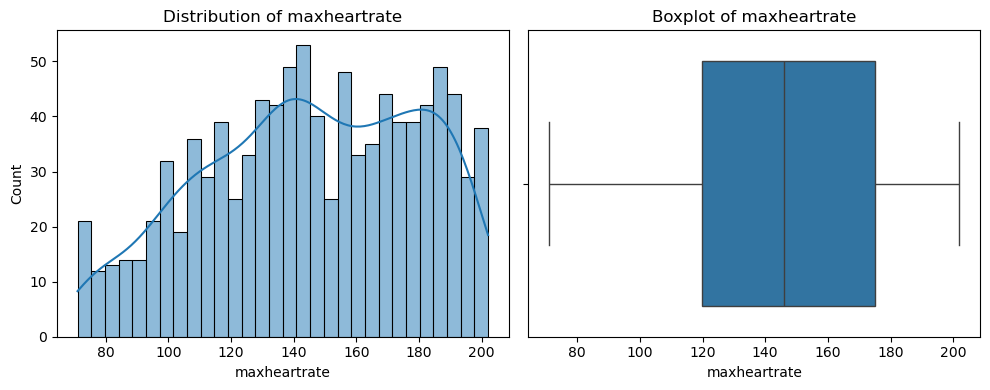


Statistics for maxheartrate:
Skewness: -0.25
Kurtosis: -0.89


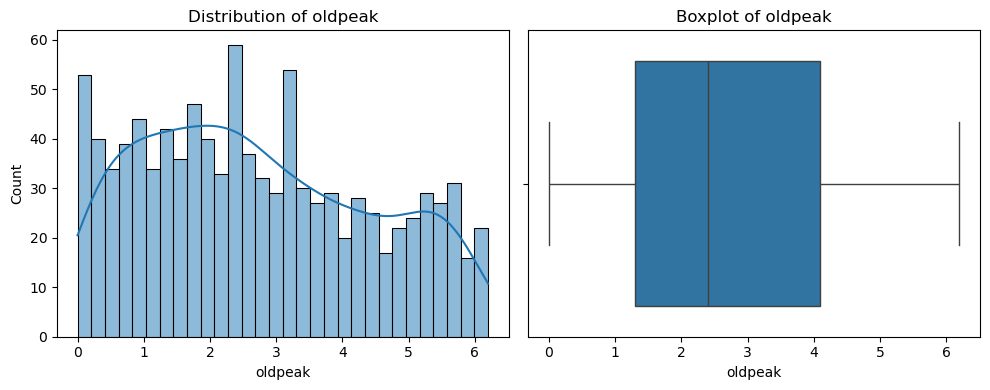


Statistics for oldpeak:
Skewness: 0.30
Kurtosis: -1.01


In [7]:
# Plot distributions of numerical variables
num_cols = ['age', 'restingBP', 'serumcholestrol', 'maxheartrate', 'oldpeak']
for col in num_cols:
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()
    
    # Skewness and kurtosis
    print(f"\nStatistics for {col}:")
    print(f"Skewness: {df[col].skew():.2f}")
    print(f"Kurtosis: {df[col].kurtosis():.2f}")

### Observations
#### Age and restingBP are uniformly distributed, Serumcholestrol and oldpeak are slightly right skewed, maxheartrate is slightly left skew.
#### All numerical features are not highly skewed (<1.0), hence no transformations required.
#### All the numerical features are of Platykurtosis implying very few outliers

#### Categorical Variables

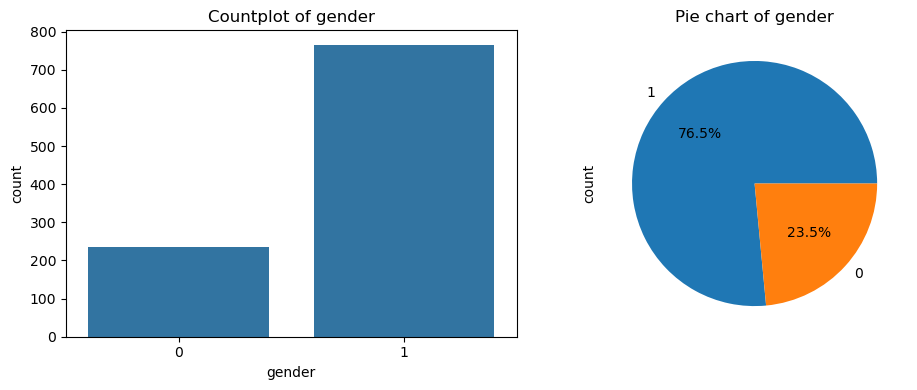


Value counts for gender:
gender
1    765
0    235
Name: count, dtype: int64


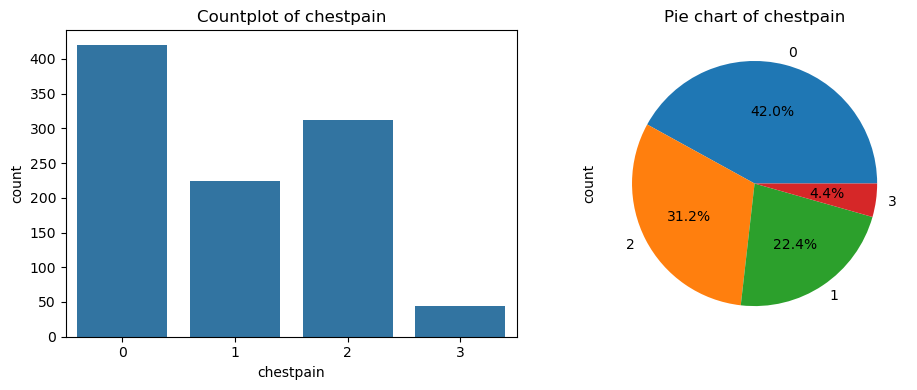


Value counts for chestpain:
chestpain
0    420
2    312
1    224
3     44
Name: count, dtype: int64


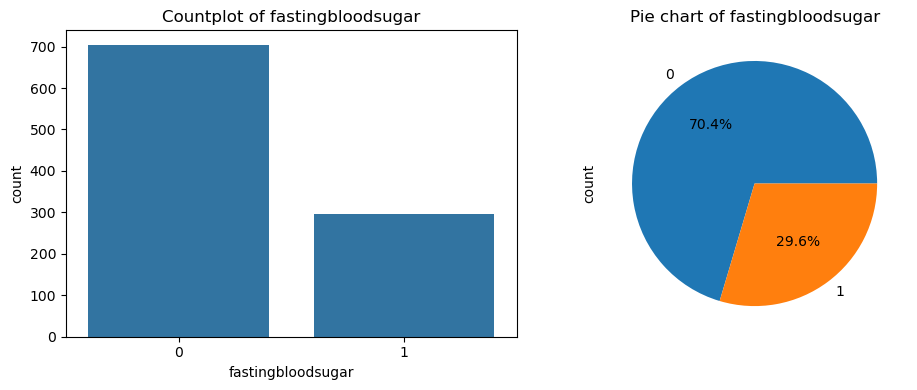


Value counts for fastingbloodsugar:
fastingbloodsugar
0    704
1    296
Name: count, dtype: int64


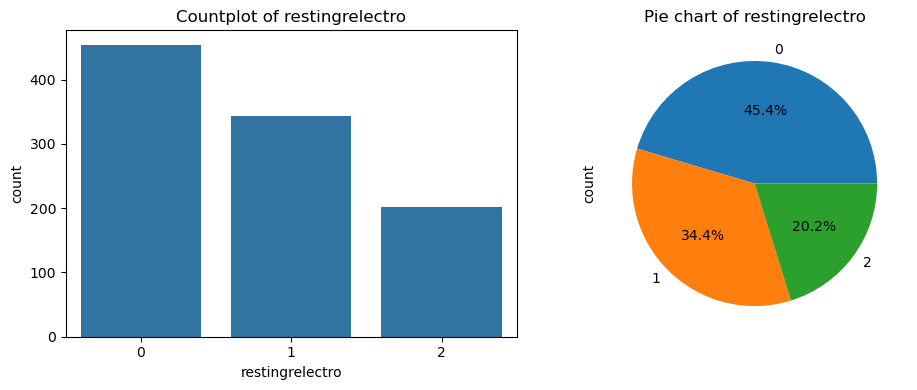


Value counts for restingrelectro:
restingrelectro
0    454
1    344
2    202
Name: count, dtype: int64


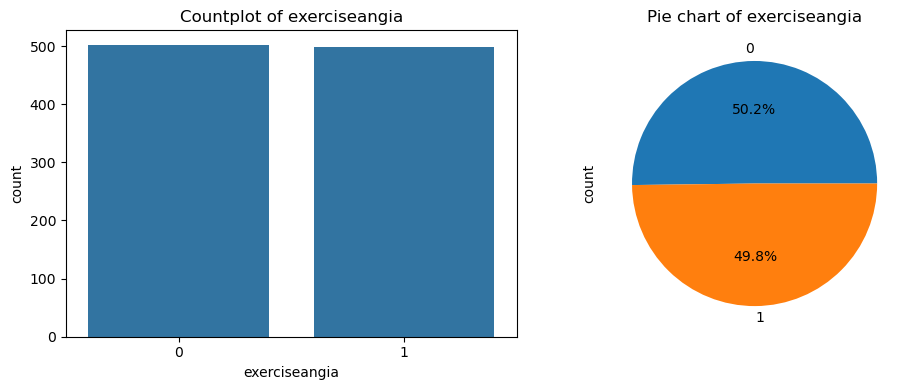


Value counts for exerciseangia:
exerciseangia
0    502
1    498
Name: count, dtype: int64


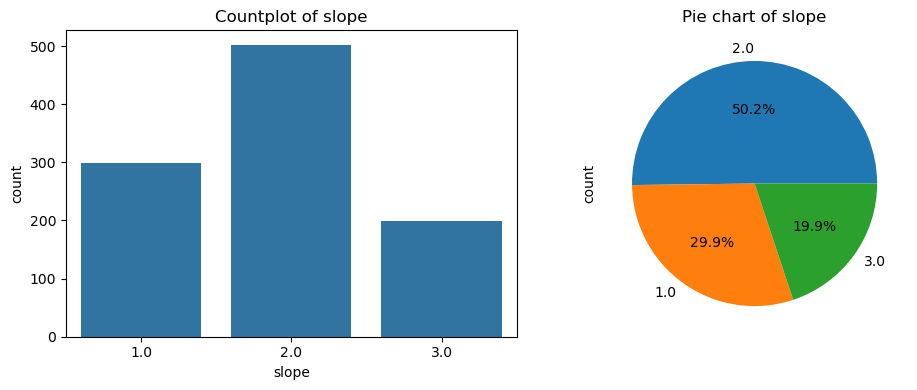


Value counts for slope:
slope
2.0    502
1.0    299
3.0    199
Name: count, dtype: int64


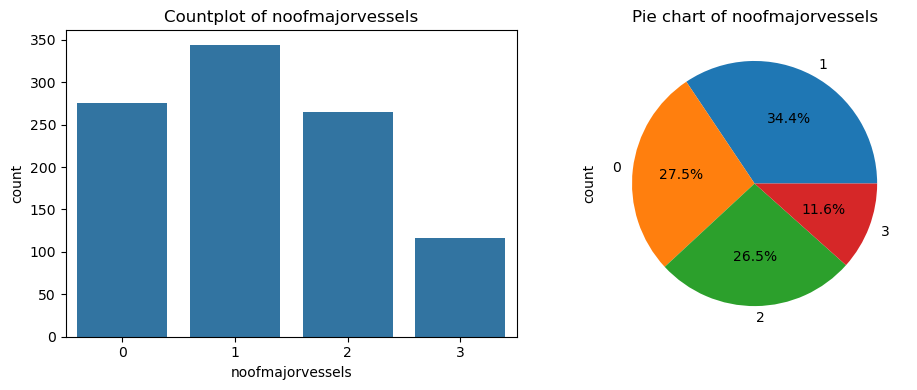


Value counts for noofmajorvessels:
noofmajorvessels
1    344
0    275
2    265
3    116
Name: count, dtype: int64


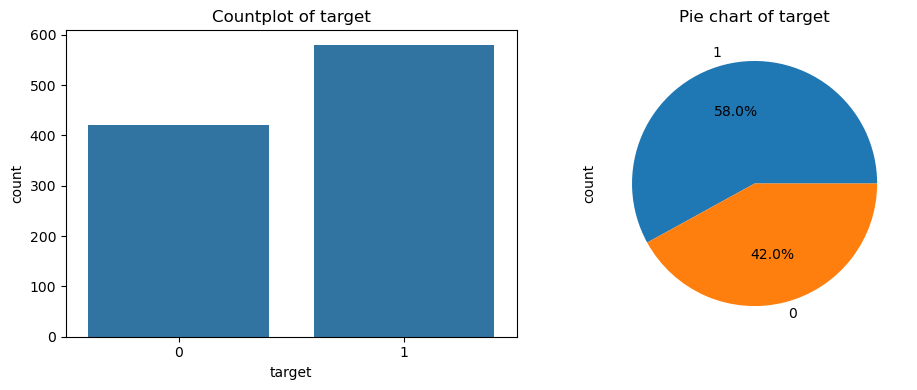


Value counts for target:
target
1    580
0    420
Name: count, dtype: int64


In [8]:
# Plot distributions of categorical variables
cat_cols = ['gender', 'chestpain', 'fastingbloodsugar', 'restingrelectro', 
            'exerciseangia', 'slope', 'noofmajorvessels', 'target']

for col in cat_cols:
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    sns.countplot(x=df[col])
    plt.title(f'Countplot of {col}')
    
    plt.subplot(1, 2, 2)
    df[col].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(f'Pie chart of {col}')
    
    plt.tight_layout()
    plt.show()
    
    # Value counts
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())

### Observations
### - all categorical features are of low cardinality (max of 4 categories), Easy to handle. Can often be one-hot encoded.
### - No data inconsistencies issue, missing values and •	Irrelevant or Erroneous Categories

The insights from univariate analysis directly dictate your next steps:
- Should I use this feature? A feature where 99% of the values are in one category (e.g., country: USA) provides almost no information for prediction and might be dropped.
- How should I encode it?
    - One-Hot Encoding is good for low-cardinality, nominal data (no order).
    - Ordinal Encoding is good for ordinal data (e.g., "Low", "Medium", "High").
    - Target/Mean Encoding or Binning might be better for high-cardinality features.

Gender \
Impact & Interpretation: \
•	This is usually NOT a problem. A 76/23 split has enough examples in both categories for a model to learn from.\
•	The model can still identify patterns and relationships for both the majority and minority groups.\
•	You might see slightly higher variance in the estimates for the minority group (23.5%), but it's unlikely to cripple your model.\
•	Conclusion: For a predictor, this is generally acceptable and common. You don't necessarily need to "fix" it.\
Final Verdict \
A 76.5% / 23.5% split is not severely imbalanced. It is a common and manageable level of asymmetry. \
•	As a predictor, it's fine.



### Visualize Class distribution.

target
1    58.0
0    42.0
Name: proportion, dtype: float64

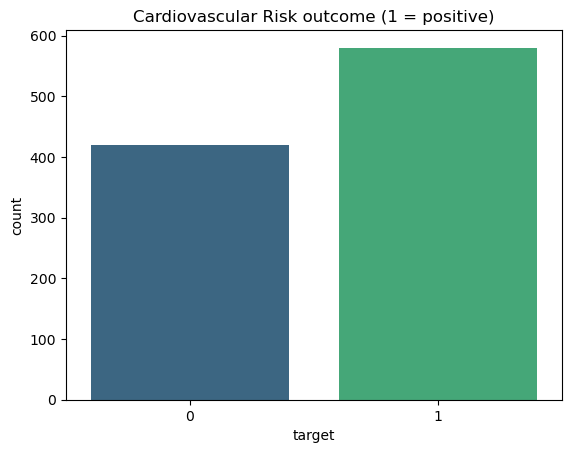

In [9]:
# Classes Distribution Ratio
sns.countplot(x='target', data=df, hue='target', palette='viridis', legend=False)
plt.title('Cardiovascular Risk outcome (1 = positive)')
df['target'].value_counts(normalize=True)*100

#To find the %

### Observation :  
#### From above barplot, the classes are slightly imbalanced (58% vs 42%).
### Conclusion : 
#### This is mildly imbalanced. It's not extreme (like 90:10 or 95:5), so many algorithms can handle it reasonably well without special treatment, therefore there will be no class imbalance handling for the models.
** **

### Bivariate Analysis - Features vs Target
#### Numerical vs Target

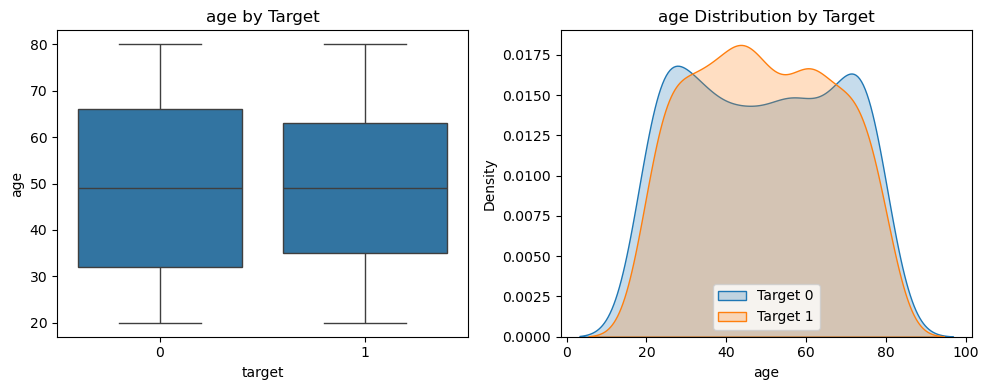


T-test for age between target groups:
T-statistic: -0.26, p-value: 0.7918


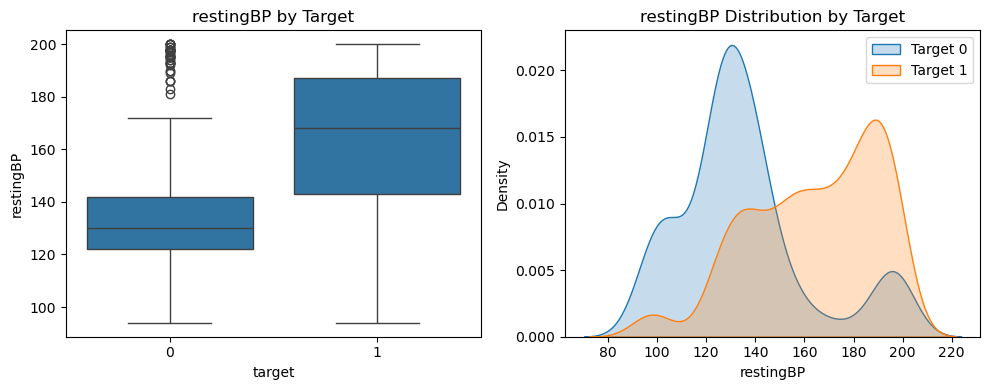


T-test for restingBP between target groups:
T-statistic: -17.40, p-value: 0.0000


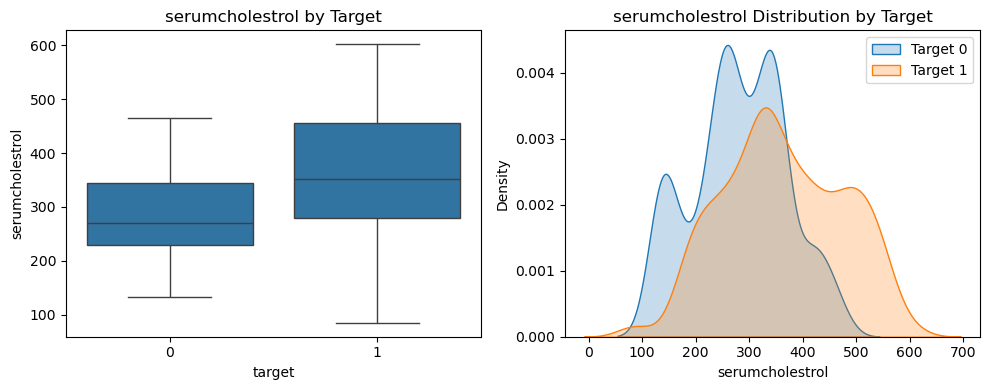


T-test for serumcholestrol between target groups:
T-statistic: -12.53, p-value: 0.0000


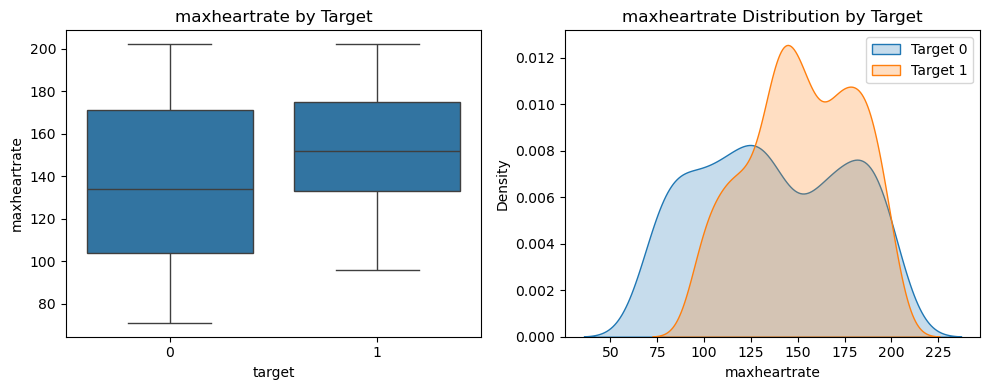


T-test for maxheartrate between target groups:
T-statistic: -7.41, p-value: 0.0000


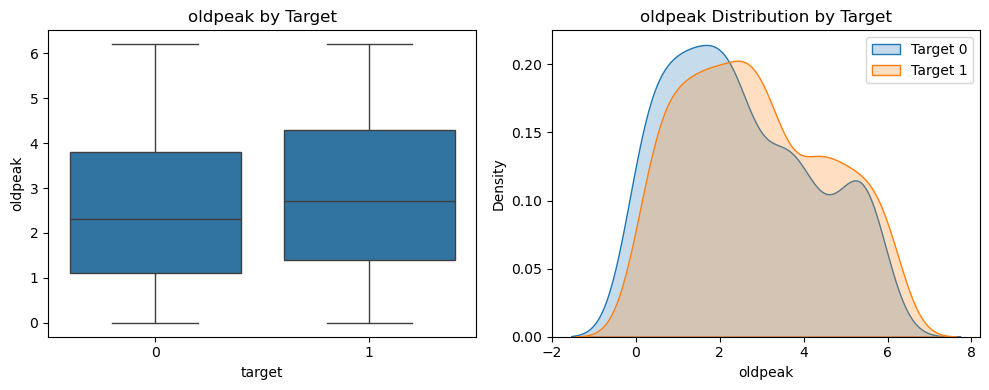


T-test for oldpeak between target groups:
T-statistic: -3.11, p-value: 0.0019


In [10]:
# Compare distributions of numerical features by target
from scipy import stats
# features = ["age", "restingBP", "serumcholestrol",  "maxheartrate", "oldpeak"]
for col in num_cols:
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    sns.boxplot(x='target', y=col, data=df)
    plt.title(f'{col} by Target')
    
    plt.subplot(1, 2, 2)
    for label in [0, 1]:
        subset = df[df["target"] == label]
        sns.kdeplot(subset[col], label=f"Target {label}", fill=True)
    plt.title(f'{col} Distribution by Target')
    
    plt.tight_layout()
    plt.legend()
    plt.show()

    # T-test for significant difference between groups
    group0 = df[df['target'] == 0][col]
    group1 = df[df['target'] == 1][col]
    t_stat, p_val = stats.ttest_ind(group0, group1, nan_policy='omit')
    print(f"\nT-test for {col} between target groups:")
    print(f"T-statistic: {t_stat:.2f}, p-value: {p_val:.4f}")

### Observation:
#### - from the boxplot, restingBP, serumcholestrol and Maxheartrate have significantly higher medians in the positive class, therefore may be more predictive, while age and oldpeak has closer medians, therefore may be less predictive.
#### - the derived p-value of Age feature are > 0.05. This suggests that the feature may not be useful for distinguishing between the groups, at least based on mean differences alone.

#### Categorical vs Target

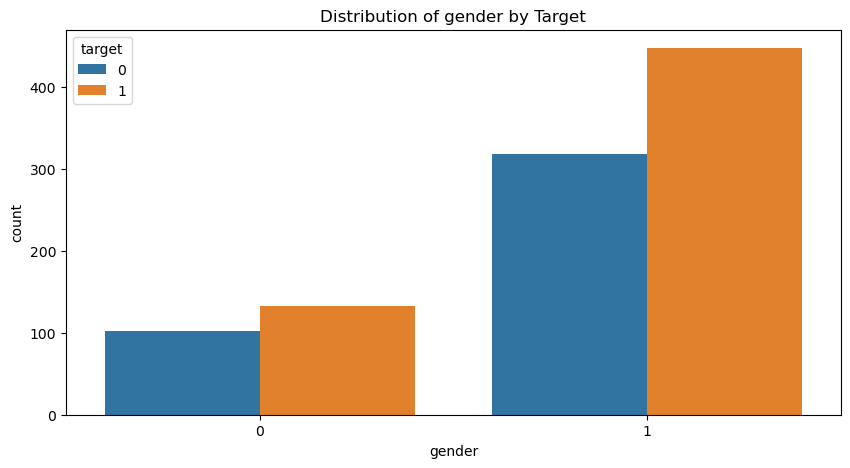


Chi-square test for gender and target:
Chi2: 0.18, p-value: 0.6722


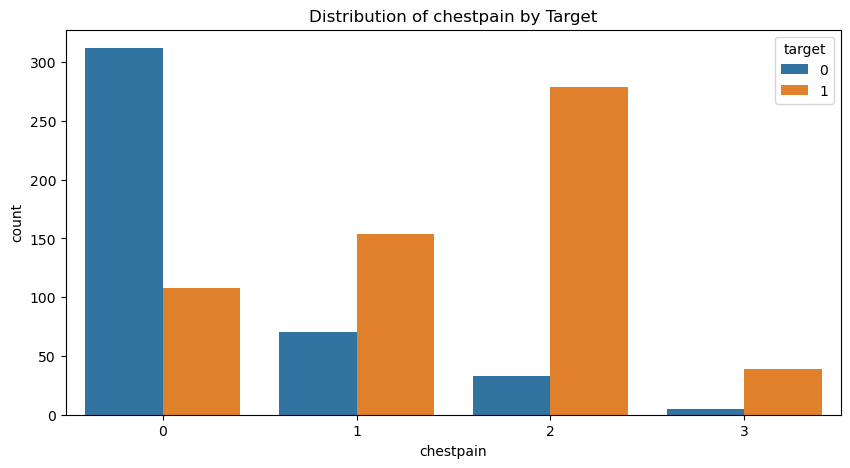


Chi-square test for chestpain and target:
Chi2: 333.76, p-value: 0.0000


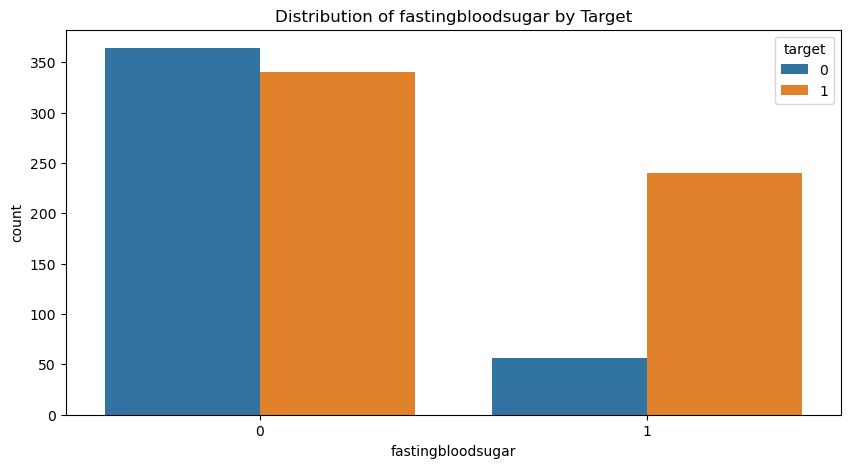


Chi-square test for fastingbloodsugar and target:
Chi2: 90.61, p-value: 0.0000


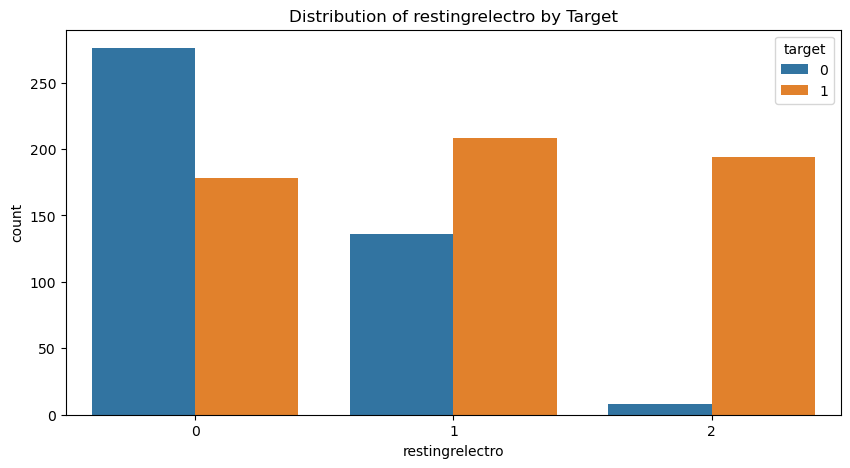


Chi-square test for restingrelectro and target:
Chi2: 186.67, p-value: 0.0000


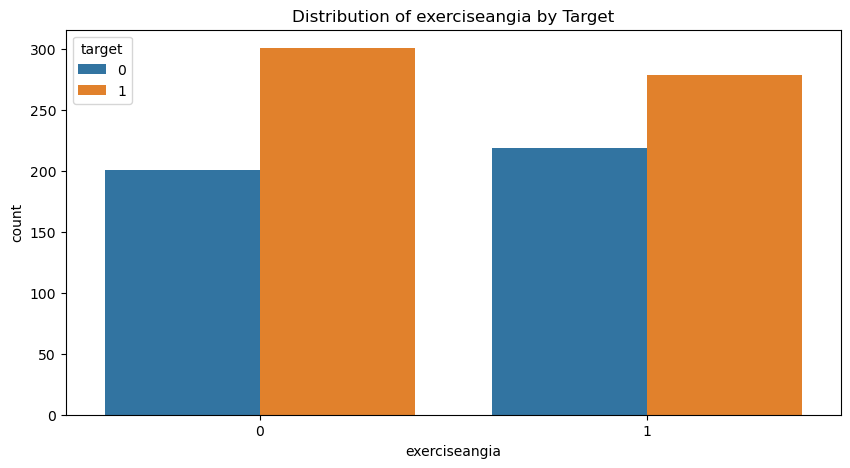


Chi-square test for exerciseangia and target:
Chi2: 1.43, p-value: 0.2314


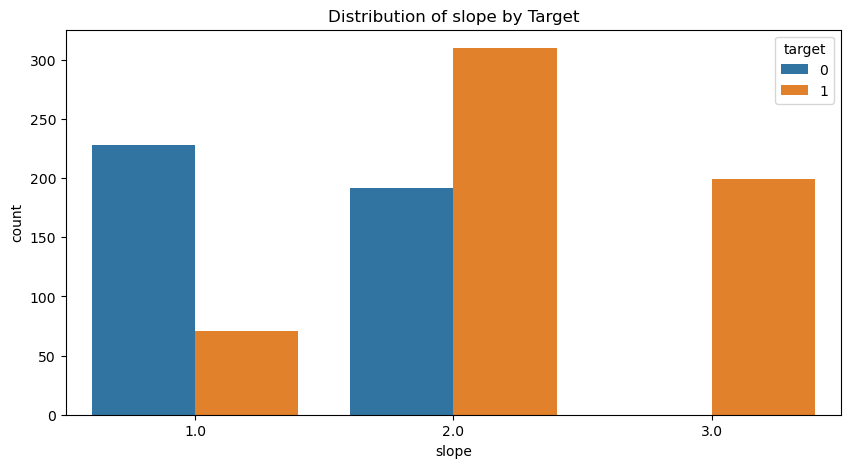


Chi-square test for slope and target:
Chi2: 291.03, p-value: 0.0000


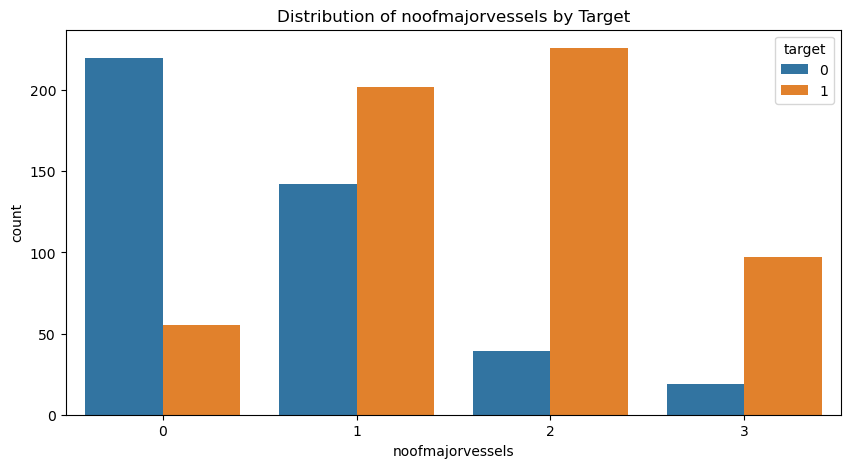


Chi-square test for noofmajorvessels and target:
Chi2: 275.32, p-value: 0.0000


In [11]:
# Compare categorical features with target
for col in cat_cols:
    if col != 'target':
        plt.figure(figsize=(10, 5))
        sns.countplot(x=col, hue='target', data=df)
        plt.title(f'Distribution of {col} by Target')
        plt.show()
        
        # Chi-square test for independence
        contingency_table = pd.crosstab(df[col], df['target'])
        chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
        print(f"\nChi-square test for {col} and target:")
        print(f"Chi2: {chi2:.2f}, p-value: {p:.4f}")

### Observation:
#### - the derived p-value of exerciseangia is > 0.05 generally means that the feature does not have a statistically significant association with the target.

### Correlation matrix
#### - correlation matrix is generally applied only to numerical features as Correlation measures linear relationships between quantitative variables.
#### - For categorical data. we had used Chi-square test to measure their categorical association above.

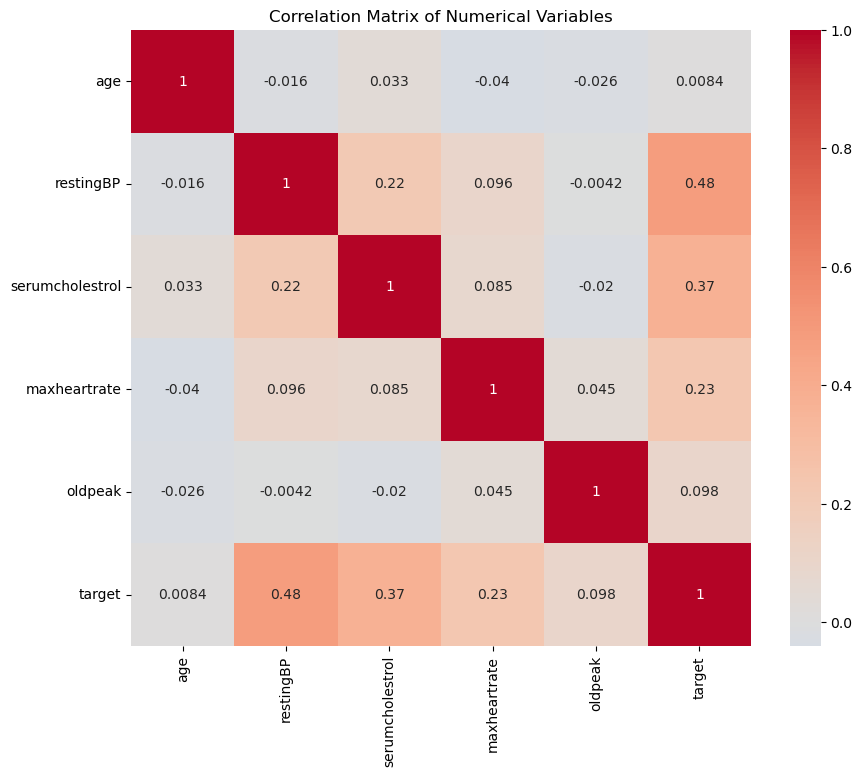

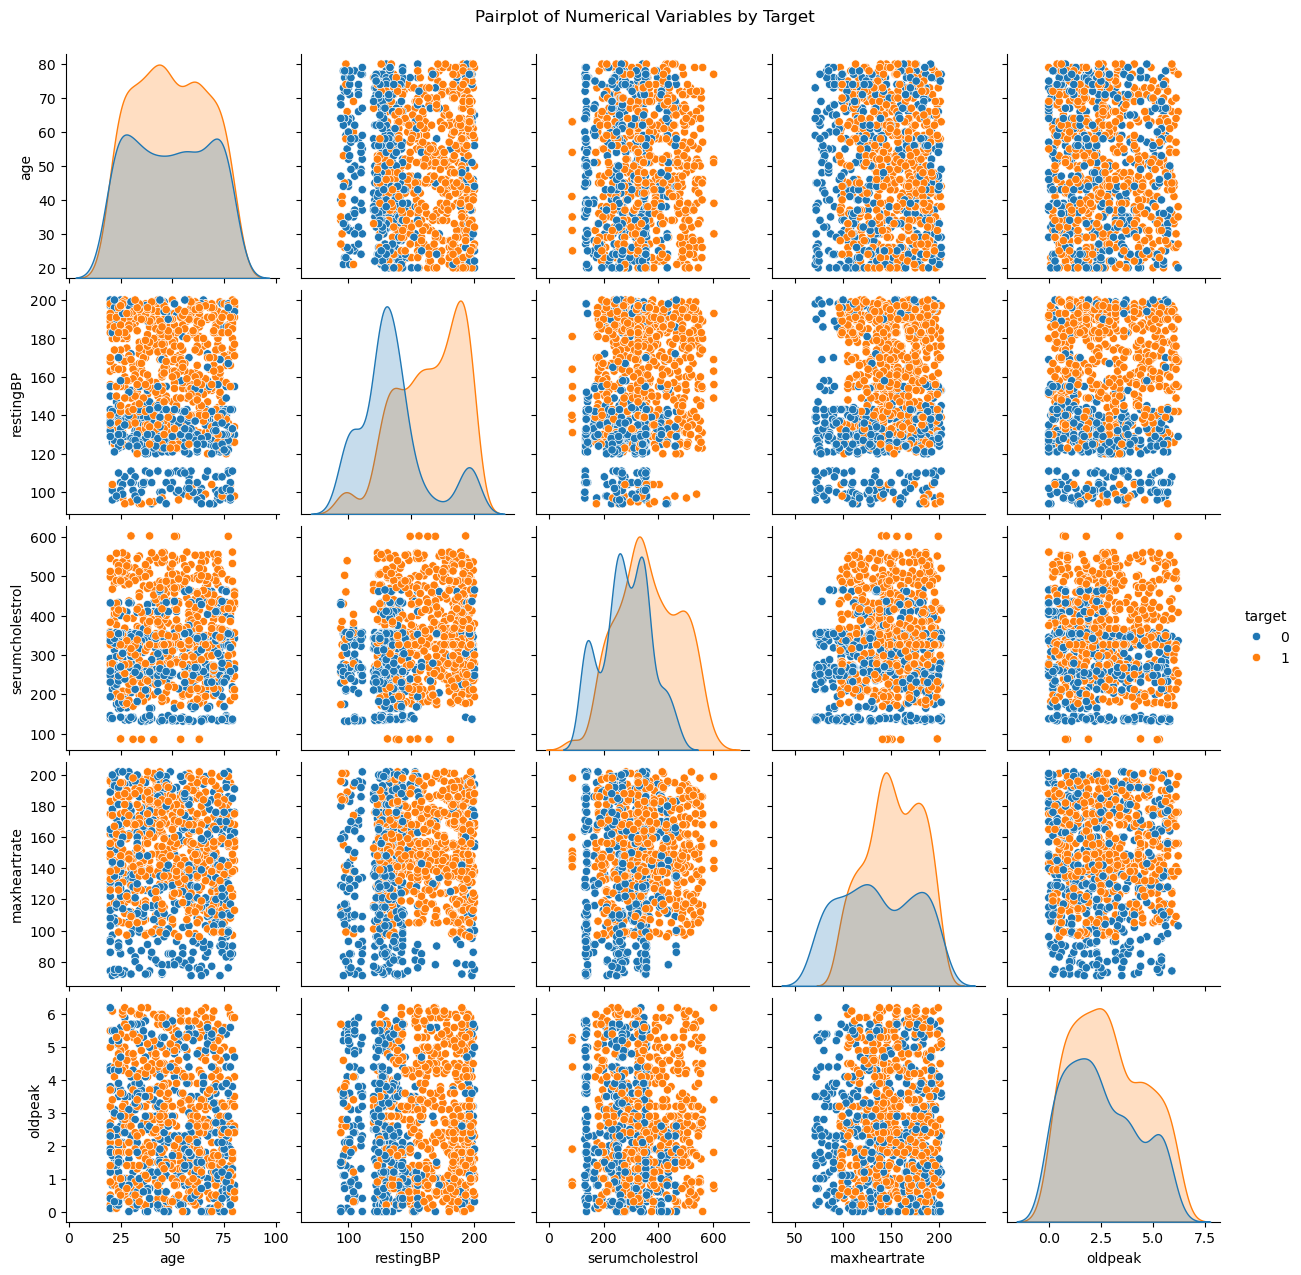

In [12]:
# Correlation matrix for numerical variables
corr_matrix = df[num_cols + ['target']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Pairplot of numerical variables colored by target
sns.pairplot(df[num_cols + ['target']], hue='target', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Variables by Target', y=1.02)
plt.show()

# # Scatterplot: Age vs Target
# plt.scatter(df['age'], df['target'], alpha=0.5)
# plt.xlabel("Age")
# plt.ylabel("Target")
# plt.title("Age vs Target")
# plt.show()

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# # Plot 1: age vs target
# sns.boxenplot(x='target', y='age', data=df, ax=ax1, palette='viridis') # Boxenplot shows more percentiles
# ax1.set_title('Age Distribution by Target Group')

# # Plot 2: oldpeak vs target
# sns.boxplot(x='target', y='oldpeak', data=df, ax=ax2, palette='viridis') # Standard boxplot
# ax2.set_title('Oldpeak Distribution by Target Group')

# plt.tight_layout()
# plt.show()

In [12]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np

# # -------------------------
# # Scatterplots (basic + jitter)
# # -------------------------
# fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# # Basic scatter: Age vs Target
# axes[0,0].scatter(df['age'], df['target'], alpha=0.5)
# axes[0,0].set_xlabel("Age")
# axes[0,0].set_ylabel("Target")
# axes[0,0].set_title("Scatter: Age vs Target")

# # Scatter with jitter: Age vs Target
# jitter = np.random.normal(0, 0.02, size=len(df))
# axes[0,1].scatter(df['age'], df['target'] + jitter, alpha=0.5, color="orange")
# axes[0,1].set_xlabel("Age")
# axes[0,1].set_ylabel("Target (jittered)")
# axes[0,1].set_title("Scatter (Jittered): Age vs Target")

# # Basic scatter: Oldpeak vs Target
# axes[1,0].scatter(df['oldpeak'], df['target'], alpha=0.5)
# axes[1,0].set_xlabel("Oldpeak")
# axes[1,0].set_ylabel("Target")
# axes[1,0].set_title("Scatter: Oldpeak vs Target")

# # Scatter with jitter: Oldpeak vs Target
# axes[1,1].scatter(df['oldpeak'], df['target'] + jitter, alpha=0.5, color="green")
# axes[1,1].set_xlabel("Oldpeak")
# axes[1,1].set_ylabel("Target (jittered)")
# axes[1,1].set_title("Scatter (Jittered): Oldpeak vs Target")

# plt.tight_layout()
# plt.show()


# # -------------------------
# # Boxplots (clearer view for binary target)
# # -------------------------
# fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# sns.boxplot(x='target', y='age', data=df, ax=axes[0])
# axes[0].set_title("Boxplot: Age by Target")

# sns.boxplot(x='target', y='oldpeak', data=df, ax=axes[1])
# axes[1].set_title("Boxplot: Oldpeak by Target")

# plt.tight_layout()
# plt.show()

### Observations 
### The correlation matrix revealed the relationships between variables.
#### - restingBP, sereumcholestrol and maxheartrate show higher positive correlation with target (0.48, 0.38,.0.23)
#### - serumcholestroland restingBP show higher positive correlation (0.22)


In [13]:
# detect outliers using IQR for numerical features
outlier_counts = {}
for col in num_cols:
    q1, q3 = df[col].quantile([0.25,0.75])
    iqr = q3-q1
    outliers = ((df[col] < q1-1.5*iqr) | (df[col] > q3+1.5*iqr)).sum()
    outlier_counts[col] = outliers
pd.Series(outlier_counts).sort_values(ascending=False)

age                0
restingBP          0
serumcholestrol    0
maxheartrate       0
oldpeak            0
dtype: int64

In [13]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import logit

# ------------------------------------------------------
# Your numerical features and target
# ------------------------------------------------------
numerical_features = ['age', 'restingBP', 'serumcholestrol', 
                      'maxheartrate', 'oldpeak']
target = "target"   # <-- replace with your actual target column name

# ------------------------------------------------------
# Make a copy of the dataframe (df = your dataset)
# ------------------------------------------------------
df_bt = df.copy()

# ------------------------------------------------------
# Step 1: Create Box–Tidwell interaction terms
# Each numerical feature gets: x * ln(x)
# Must ensure values > 0 before log-transform
# ------------------------------------------------------
for col in numerical_features:
    min_val = df_bt[col].min()
    if min_val <= 0:
        df_bt[col] = df_bt[col] + abs(min_val) + 1   # shift to positive
    df_bt[col + "_log"] = df_bt[col] * np.log(df_bt[col])

# ------------------------------------------------------
# Step 2: Build logistic regression formula
# target ~ num_features + num_features*ln(num_features)
# ------------------------------------------------------
all_features = numerical_features + [f"{col}_log" for col in numerical_features]
formula = target + " ~ " + " + ".join(all_features)

# ------------------------------------------------------
# Step 3: Run logistic regression with Box–Tidwell terms
# ------------------------------------------------------
model = logit(formula, data=df_bt).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.438430
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      989
Method:                           MLE   Df Model:                           10
Date:                Tue, 26 Aug 2025   Pseudo R-squ.:                  0.3555
Time:                        04:46:23   Log-Likelihood:                -438.43
converged:                       True   LL-Null:                       -680.29
Covariance Type:            nonrobust   LLR p-value:                 1.324e-97
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -39.6851      6.216     -6.384      0.000     -51.868     -27.502
ag

### Quick Summary of EDA
#### - RestingBP, Serumcholertrol, maxheartrate - More predictive for cardiovascular risk
#### - Serumcholertrol - lower for cardiovascular risk individuals
#### - maxheartrate - higher for cardiovascular risk individuals
#### - type of chestpain and noofmajorbessels - higher cardiovascular risk for certain tpe of chestpain and certain no of major vessels
#### - Age - Not a good predictor
#### - Missing Data - Present in serumcholestrol.

### Correlation heat-map showed the correlation of each feature with Outcome
#### 3 features had the highest positive values, restingBP, sereumcholestrol and maxheartrate show higher positive correlation with target (0.48, 0.38,.0.23)

### Box / violin plots (Target vs each feature)
#### These plots revealed clear separations in medians for restingBP, serumchloestrol and maxheartrate between cardio risk (1) and non-cardio risk (0) groups, whereas other features had heavily overlapping distributions.

#### The outliers in the dataset do not overturn the “strong vs weak predictor” ranking that we already obtained from correlations and boxplots.

## Data Preprocessing
### Data cleaning
#### Preprocessing

#### Impute missing values
#### Split into train/test sets
#### Scale the features
#### Ensure readiness for modeling

In [14]:
# Preprocessing
X = df.drop('target', axis=1)
y = df['target']

# Define categorical and numerical features for preprocessing
categorical_features = ['gender', 'chestpain', 'fastingbloodsugar', 'restingrelectro', 'exerciseangia', 'slope', 'noofmajorvessels']
numerical_features = ['age', 'restingBP', 'serumcholestrol', 'maxheartrate', 'oldpeak']


# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # Although no missing values, it's good practice
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a preprocessor to apply the transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

X_transformed = preprocessor.fit_transform(X)

cat_features = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
all_feature_names = numerical_features + list(cat_features)

X_transformed_df = pd.DataFrame(X_transformed, columns=all_feature_names)
print(X_transformed_df.columns.tolist())

# Split into train and test datasets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed_df, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape

['age', 'restingBP', 'serumcholestrol', 'maxheartrate', 'oldpeak', 'gender_0.0', 'gender_1.0', 'chestpain_0.0', 'chestpain_1.0', 'chestpain_2.0', 'chestpain_3.0', 'fastingbloodsugar_0.0', 'fastingbloodsugar_1.0', 'restingrelectro_0.0', 'restingrelectro_1.0', 'restingrelectro_2.0', 'exerciseangia_0.0', 'exerciseangia_1.0', 'slope_1.0', 'slope_2.0', 'slope_3.0', 'noofmajorvessels_0.0', 'noofmajorvessels_1.0', 'noofmajorvessels_2.0', 'noofmajorvessels_3.0']


((800, 25), (200, 25))

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import logit
from sklearn.preprocessing import OneHotEncoder

# ------------------------------------------------------
# Example: Assume you have a dataset "df" with target "target"
# Replace with your actual DataFrame
# ------------------------------------------------------

categorical_features = ['gender', 'chestpain', 'fastingbloodsugar',
                        'restingrelectro', 'exerciseangia', 'slope',
                        'noofmajorvessels']

numerical_features = ['age', 'restingBP', 'serumcholestrol',
                      'maxheartrate', 'oldpeak']

target = "target"   # <-- replace with your actual target column

# ------------------------------------------------------
# One-hot encode categorical features
# ------------------------------------------------------
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# ------------------------------------------------------
# Box–Tidwell Test setup: create interaction terms
# Each numerical feature gets: x * ln(x)
# ------------------------------------------------------
for col in numerical_features:
    # avoid log(0) or negative by shifting if needed
    min_val = df_encoded[col].min()
    if min_val <= 0:
        df_encoded[col] = df_encoded[col] + abs(min_val) + 1
    
    df_encoded[col + "_log"] = df_encoded[col] * np.log(df_encoded[col])

# ------------------------------------------------------
# Build formula for logistic regression
# target ~ num_features + num_features*ln(num_features) + categorical_dummies
# ------------------------------------------------------
all_features = numerical_features + [col + "_log" for col in numerical_features] + \
               [c for c in df_encoded.columns if c not in numerical_features + [target] + [col + "_log" for col in numerical_features]]

formula = target + " ~ " + " + ".join(all_features)

# ------------------------------------------------------
# Logistic Regression with Box–Tidwell interaction terms
# ------------------------------------------------------
model = logit(formula, data=df_encoded).fit()

print(model.summary())

### Hyperparameter tuning

### Model performance comparison

In [78]:
# Train Logistic Regression with hyperparameter tuning

#Define parameter grid for Logistic Regression
logreg_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'class_weight': [None, 'balanced']
}


# Create and tune model
logreg = LogisticRegression(max_iter=1000)
logreg_grid = GridSearchCV(logreg, logreg_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
logreg_grid.fit(X_train, y_train)

# Best model
best_logreg = logreg_grid.best_estimator_
print("\nBest Logistic Regression Params:", logreg_grid.best_params_)


# Evaluate best model
y_pred = best_logreg.predict(X_test)
print("Best Hyperparameters:", logreg_grid.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


# Random Forest with hyperparameter tuning
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [100, 200, None],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced']
}


# Train with Grid Search
rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_rf.fit(X_train, y_train)

# Best model
best_rf = grid_rf.best_estimator_
print("\nBest Random Forest Params:", grid_rf.best_params_)

# Evaluate best model
y_pred_rf = best_rf.predict(X_test)

print("\nBest Random Forest Parameters:", grid_rf.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Logistic Regression Params: {'C': 1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Best Hyperparameters: {'C': 1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Test Accuracy: 0.955
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95        83
           1       0.97      0.96      0.96       117

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.96      0.95      0.96       200

Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best Random Forest Params: {'class_weight': 'balanced', 'max_depth': 100, 'min_samples_split': 2, 'n_estimators': 100}

Best Random Forest Parameters: {'class_weight': 'balanced', 'max_depth': 100, 'min_samples_split': 2, 'n_estimators': 100}
Test Accuracy: 0.965
Classification Report:
        

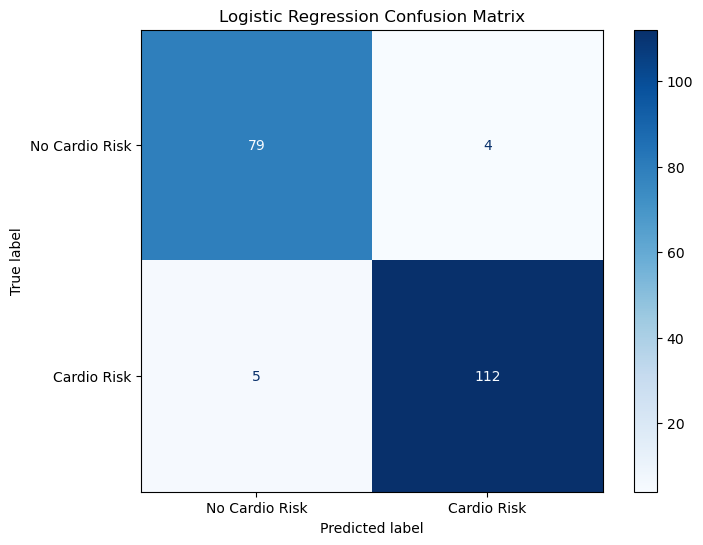

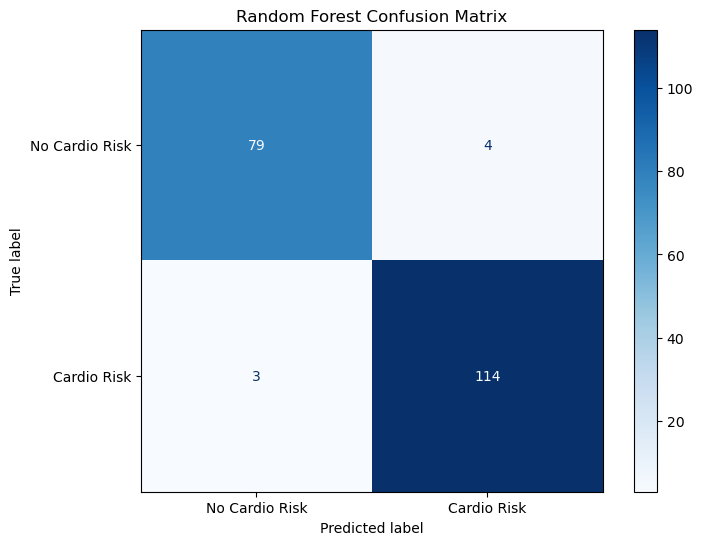

In [79]:
# --- Plot Confusion Matrix Heatmaps ---

# Logistic Regression Confusion Matrix
cm_log_reg = confusion_matrix(y_test, y_pred, labels=logreg_grid.best_estimator_.classes_)
disp_log_reg = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg, display_labels=['No Cardio Risk', 'Cardio Risk'])
fig_log_reg, ax_log_reg = plt.subplots(figsize=(8, 6))
disp_log_reg.plot(cmap='Blues', ax=ax_log_reg, values_format='d')
ax_log_reg.set_title('Logistic Regression Confusion Matrix')
plt.show()

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=grid_rf.best_estimator_.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['No Cardio Risk', 'Cardio Risk'])
fig_rf, ax_rf = plt.subplots(figsize=(8, 6))
disp_rf.plot(cmap='Blues', ax=ax_rf, values_format='d')
ax_rf.set_title('Random Forest Confusion Matrix')
plt.show()

### Insight
### Random Forest is better at identifying cardio risk with

### Higher True Positive (114 vs 112)
### This is critical in medical diagnosis: missing cardio risk (false negatives) is worse than falsely labeling a few healthy people.

## drop age

In [85]:
# Preprocessing

# X = df.drop(columns=['target','age', 'maxheartrate', 'oldpeak'])
X = df.drop(columns=['target','age'])
y = df['target']

# Define categorical and numerical features for preprocessing
categorical_features = ['gender', 'chestpain', 'fastingbloodsugar', 'restingrelectro', 'exerciseangia', 'slope', 'noofmajorvessels']
# numerical_features = ['age', 'restingBP', 'serumcholestrol', 'maxheartrate', 'oldpeak']
numerical_features = ['restingBP', 'serumcholestrol', 'maxheartrate', 'oldpeak']

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # Although no missing values, it's good practice
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a preprocessor to apply the transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

X_transformed = preprocessor.fit_transform(X)

cat_features = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
all_feature_names = numerical_features + list(cat_features)

X_transformed_df = pd.DataFrame(X_transformed, columns=all_feature_names)

# Split into train and test datasets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed_df, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape




((800, 24), (200, 24))

In [88]:
# --- Logistic Regression with Hyperparameter Tuning ---
# Create an instance of the Logistic Regression model
log_reg = LogisticRegression(solver='liblinear', max_iter=2000, random_state=42)

# Define the hyperparameter grid for Logistic Regression
# 'C' is the inverse of regularization strength; smaller values specify stronger regularization.
log_reg_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}
# Set up GridSearchCV to find the best parameters for Logistic Regression
log_reg_grid = GridSearchCV(log_reg, log_reg_params, cv=5, scoring='accuracy', n_jobs=-1)
log_reg_grid.fit(X_train, y_train)

print("Starting hyperparameter tuning for Random Forest...")
# --- Random Forest with Hyperparameter Tuning ---
# Create an instance of the Random Forest model
rf = RandomForestClassifier(random_state=42)
#actual
rf_params = {
     'n_estimators': [100, 200],
     'max_depth': [100, 200, None],
     'min_samples_split': [2, 5]
}

rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)

# --- Make predictions ---
log_reg_pred = log_reg_grid.predict(X_test)
rf_pred = rf_grid.predict(X_test)

# --- Evaluate models ---
results = {
    "Logistic Regression Best Params": log_reg_grid.best_params_,
    "Logistic Regression Accuracy": accuracy_score(y_test, log_reg_pred),
    "Random Forest Best Params": rf_grid.best_params_,
    "Random Forest Accuracy": accuracy_score(y_test, rf_pred)
}

print(results)
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, log_reg_pred))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_pred))

Starting hyperparameter tuning for Random Forest...
{'Logistic Regression Best Params': {'C': 1}, 'Logistic Regression Accuracy': 0.95, 'Random Forest Best Params': {'max_depth': 100, 'min_samples_split': 2, 'n_estimators': 100}, 'Random Forest Accuracy': 0.975}

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        83
           1       0.96      0.96      0.96       117

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        83
           1       0.98      0.97      0.98       117

    accuracy                           0.97       200
   macro avg       0.97      0.98      0.97       200
weighted avg       0.98      0.97      0.98       200



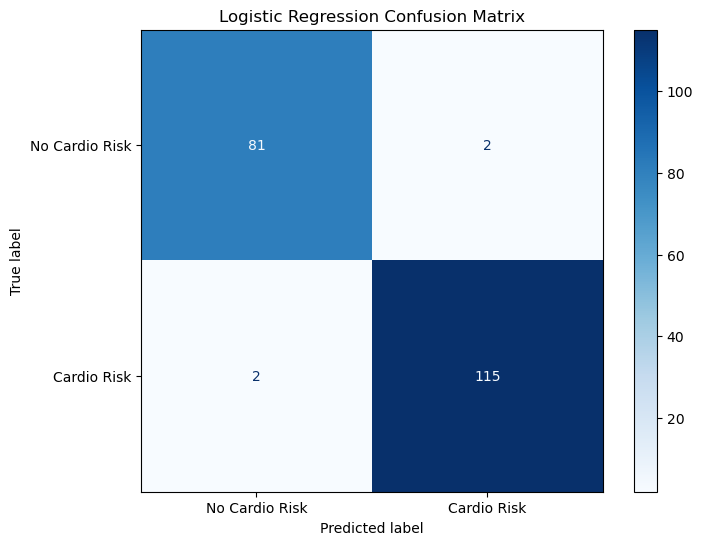

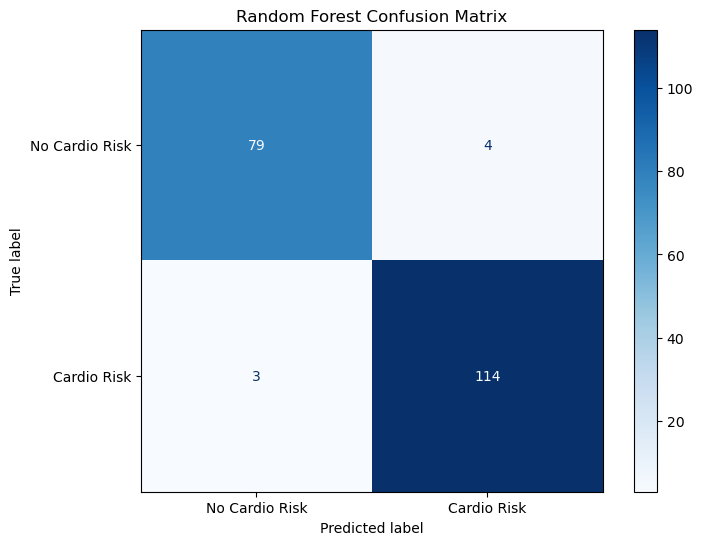

In [89]:
# --- Plot Confusion Matrix Heatmaps ---

# Logistic Regression Confusion Matrix
cm_log_reg = confusion_matrix(y_test, y_pred, labels=logreg_grid.best_estimator_.classes_)
disp_log_reg = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg, display_labels=['No Cardio Risk', 'Cardio Risk'])
fig_log_reg, ax_log_reg = plt.subplots(figsize=(8, 6))
disp_log_reg.plot(cmap='Blues', ax=ax_log_reg, values_format='d')
ax_log_reg.set_title('Logistic Regression Confusion Matrix')
plt.show()

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=grid_rf.best_estimator_.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['No Cardio Risk', 'Cardio Risk'])
fig_rf, ax_rf = plt.subplots(figsize=(8, 6))
disp_rf.plot(cmap='Blues', ax=ax_rf, values_format='d')
ax_rf.set_title('Random Forest Confusion Matrix')
plt.show()

In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np


# Define features (X) and target (y)
# X = df.drop(columns=['patientid', 'target'])
# y = df['target']

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)] + [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a RandomForestClassifier model
rf = RandomForestClassifier(random_state=42)

# Create a RandomizedSearchCV object
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                               n_iter=5, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
rf_random.fit(X_train, y_train)

# Get the best model
best_rf = rf_random.best_estimator_

# Make predictions and evaluate the model
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Best Parameters found by RandomizedSearchCV:")
print(rf_random.best_params_)
print("\nAccuracy on the test set:")
print(accuracy)
# print("\nClassification Report on the test set:")
# print(report)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters found by RandomizedSearchCV:
{'n_estimators': 600, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': False}

Accuracy on the test set:
0.98


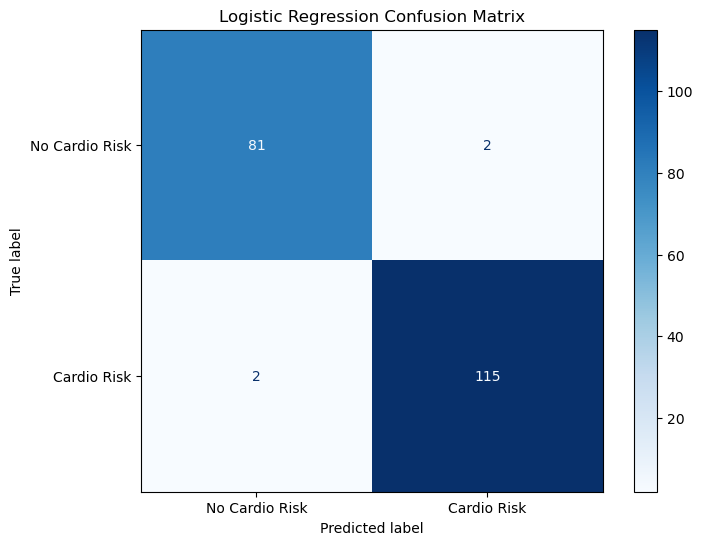

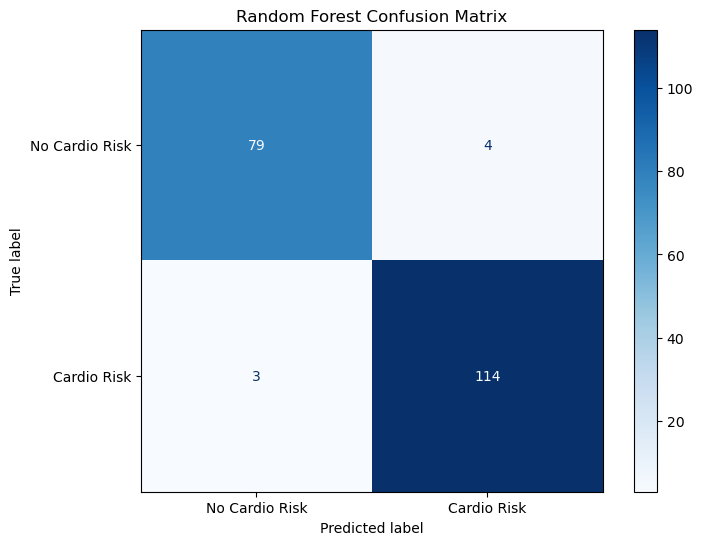

[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   1.6s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   1.5s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   1.4s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   4.2s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   4.1s
[CV] END bootstrap=False, max_depth=80

In [91]:
# --- Plot Confusion Matrix Heatmaps ---

# Logistic Regression Confusion Matrix
cm_log_reg = confusion_matrix(y_test, y_pred, labels=logreg_grid.best_estimator_.classes_)
disp_log_reg = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg, display_labels=['No Cardio Risk', 'Cardio Risk'])
fig_log_reg, ax_log_reg = plt.subplots(figsize=(8, 6))
disp_log_reg.plot(cmap='Blues', ax=ax_log_reg, values_format='d')
ax_log_reg.set_title('Logistic Regression Confusion Matrix')
plt.show()

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=grid_rf.best_estimator_.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['No Cardio Risk', 'Cardio Risk'])
fig_rf, ax_rf = plt.subplots(figsize=(8, 6))
disp_rf.plot(cmap='Blues', ax=ax_rf, values_format='d')
ax_rf.set_title('Random Forest Confusion Matrix')
plt.show()

[0.4625     0.4556962  0.46153846 0.45454545 0.44736842 0.45333333
 0.45945946 0.45205479 0.45833333 0.46478873 0.45714286 0.46376812
 0.47058824 0.46268657 0.46969697 0.46153846 0.46875    0.46031746
 0.4516129  0.44262295 0.45       0.44067797 0.44827586 0.45614035
 0.44642857 0.45454545 0.46296296 0.47169811 0.46153846 0.47058824
 0.46       0.46938776 0.47916667 0.4893617  0.5        0.51111111
 0.52272727 0.53488372 0.54761905 0.56097561 0.55       0.53846154
 0.55263158 0.54054054 0.55555556 0.54285714 0.52941176 0.51515152
 0.53125    0.5483871  0.53333333 0.51724138 0.5        0.48148148
 0.5        0.48       0.5        0.47826087 0.45454545 0.47619048
 0.5        0.52631579 0.5        0.52941176 0.5625     0.53333333
 0.5        0.46153846 0.5        0.54545455 0.6        0.55555556
 0.625      0.57142857 0.5        0.6        0.75       1.
 1.         1.         1.        ] [1.         0.97297297 0.97297297 0.94594595 0.91891892 0.91891892
 0.91891892 0.89189189 0.89189189 0

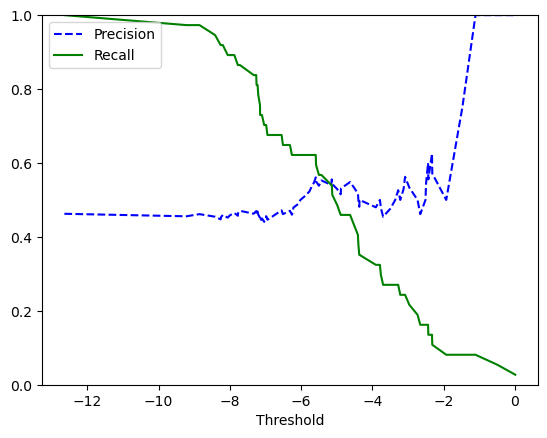

In [56]:
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import SGDClassifier # Or any other classifier
from sklearn.model_selection import train_test_split
import numpy as np

# --- Assuming you have X_train and y_train defined ---
# For demonstration purposes, let's create some dummy data
X = np.random.rand(100, 10)
y = np.random.randint(0, 2, 100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Train a classifier
# Here, we'll use an SGDClassifier, but replace with your actual model
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

# 2. Generate decision scores for the training set
# Use decision_function for models that provide it (like SGDClassifier, SVC)
# Or use predict_proba[:, 1] for models that provide probabilities (like LogisticRegression, RandomForestClassifier)
y_train_scores = sgd_clf.decision_function(X_train)

# Now, precision_recall_curve should work
precisions, recalls, thresholds = precision_recall_curve(y_train, y_train_scores)
print(precisions, recalls, thresholds)

# Your plotting function (from your original code, if you have it)
def plot_precision_recall_curve(precisions, recalls, thresholds):
    import matplotlib.pyplot as plt
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    plt.show()

plot_precision_recall_curve(precisions, recalls, thresholds)

In [71]:
# Preprocessing
X = df.drop('target', axis=1)
y = df['target']

# Import the OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder

# Define categorical and numerical features for preprocessing
#categorical_features = ['gender', 'chestpain', 'fastingbloodsugar', 'restingrelectro', 'exerciseangia', 'slope', 'noofmajorvessels']
numerical_features = ['age', 'restingBP', 'serumcholestrol', 'maxheartrate', 'oldpeak']
ordinal_features = ['chestpain', 'slope', 'noofmajorvessels']
nominal_features = ['gender', 'fastingbloodsugar', 'restingrelectro', 'exerciseangia']


ordinal_categories = [
    [0, 1, 2, 3],  # Order for 'chestpain': 0=typical ang, 1=atypical ang, 2=non-anginal, 3=asymptomatic
    [1, 2, 3],     # Order for 'slope': 1=upsloping, 2=flat, 3=downsloping
    [0, 1, 2, 3]   # Order for 'noofmajorvessels': 0 is best, 3 is worst
]

# This is often sufficient for these columns
# df['chestpain'] = df['chestpain'].astype(int)
# df['slope'] = df['slope'].astype(int)
# df['noofmajorvessels'] = df['noofmajorvessels'].astype(int)


# 3. Handle ordinal features: Ensure correct data type
# (Since they are already correctly encoded, astype is enough)
# df[ordinal_features] = df[ordinal_features].astype(int)


# 3. CREATE THE PIPELINES

# Pipeline for Numerical Features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # Use 'mean' or 'median'
    ('scaler', StandardScaler())
])

# Pipeline for Ordinal Features
ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
#    ('ordinal', OrdinalEncoder(categories=ordinal_categories)) # Apply Ordinal Encoding
])

# Pipeline for Nominal Features
nominal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
#    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='if_binary')) # One-Hot for nominal
])

# 4. CREATE THE COLUMN TRANSFORMER
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('ord', ordinal_transformer, ordinal_features), # New transformer for ordinal
        ('nom', nominal_transformer, nominal_features)  # Renamed from 'cat' to 'nom' for clarity
    ],
    remainder='passthrough' # Be careful with this. Usually set to 'drop' if you've defined all columns.
)


# 5. FIT AND TRANSFORM THE DATA
X_transformed = preprocessor.fit_transform(X)

# 6. GET THE FEATURE NAMES (This is more complex now)
# Get names from each transformer
num_feature_names = numerical_features
ord_feature_names = preprocessor.named_transformers_['ord'].get_feature_names_out(ordinal_features)
nom_feature_names = preprocessor.named_transformers_['nom'].get_feature_names_out(nominal_features)
# ord_feature_names = preprocessor.named_transformers_['ord']['ordinal'].get_feature_names_out(ordinal_features)
# nom_feature_names = preprocessor.named_transformers_['nom']['onehot'].get_feature_names_out(nominal_features)

# Combine all feature names
all_feature_names = list(num_feature_names) + list(ord_feature_names) + list(nom_feature_names)
# all_feature_names = list(num_feature_names) + list(ordinal_features) + list(nominal_features)

# 7. CREATE THE FINAL DATAFRAME
X_transformed_df = pd.DataFrame(X_transformed, columns=all_feature_names)

# Print the result to verify
print("Transformed DataFrame Shape:", X_transformed_df.shape)
print("\nFirst 5 rows:")
print(X_transformed_df.head())
print("\nNew Column Names:")
print(X_transformed_df.columns.tolist())


# Split into train and test datasets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed_df, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape





Transformed DataFrame Shape: (1000, 12)

First 5 rows:
        age  restingBP  serumcholestrol  maxheartrate   oldpeak  chestpain  \
0  0.210464   0.642833        -0.024777      0.044567  1.507245        2.0   
1 -0.517591  -1.928098        -0.906757     -0.891840  0.576955        0.0   
2 -0.013553  -0.625938        -1.697812      1.654017  1.332816        2.0   
3 -0.349578  -0.458995        -0.306647      0.220143  0.286239        0.0   
4 -1.021629   1.577717        -0.024777     -0.277323  1.507245        1.0   

   slope  noofmajorvessels  gender  fastingbloodsugar  restingrelectro  \
0    3.0               3.0     1.0                0.0              1.0   
1    1.0               1.0     1.0                0.0              1.0   
2    1.0               0.0     1.0                0.0              0.0   
3    2.0               2.0     1.0                1.0              1.0   
4    3.0               2.0     1.0                0.0              2.0   

   exerciseangia  
0           

((800, 12), (200, 12))

In [75]:
# Train Logistic Regression with hyperparameter tuning

#Define parameter grid for Logistic Regression
logreg_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'class_weight': [None, 'balanced']
}

# logreg_param_grid = {
#     'C': [0.01, 0.1, 1, 100],
#     'solver': ['liblinear', 'lbfgs'],
#     'class_weight': ['balanced']
# }

# Create and tune model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg_grid = GridSearchCV(logreg, logreg_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
logreg_grid.fit(X_train, y_train)

# Best model
best_logreg = logreg_grid.best_estimator_
print("\nBest Logistic Regression Params:", logreg_grid.best_params_)


# Evaluate best model
y_pred = best_logreg.predict(X_test)
print("Best Hyperparameters:", logreg_grid.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Now coefficients should match the correct columns
importance = pd.Series(best_logreg.coef_[0], index=X_train.columns)

# Get feature importance (coefficients)
importance = pd.Series(best_logreg.coef_[0], index=X.columns)

# Sort by absolute effect
importance = importance.abs().sort_values(ascending=False)
print(importance.head(10))



# Random Forest with hyperparameter tuning
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [100, 200, None],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced']
}


# Train with Grid Search
rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_rf.fit(X_train, y_train)

# Best model
best_rf = grid_rf.best_estimator_
print("\nBest Random Forest Params:", grid_rf.best_params_)

# Evaluate best model
y_pred_rf = best_rf.predict(X_test)

print("\nBest Random Forest Parameters:", grid_rf.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))



# Get feature importance
importance = pd.Series(best_rf.feature_importances_, index=X.columns)
importance = importance.sort_values(ascending=False)
print(importance.head(10))

Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Logistic Regression Params: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Best Hyperparameters: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Test Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        83
           1       0.96      0.94      0.95       117

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200

restingrelectro      0.963223
fastingbloodsugar    0.882900
gender               0.707708
maxheartrate         0.690194
slope                0.584215
chestpain            0.458777
restingBP            0.269842
oldpeak              0.027341
serumcholestrol      0.010111
age                  0.000000
dtype: float64
Fitting 5 folds for each of 12 candidat

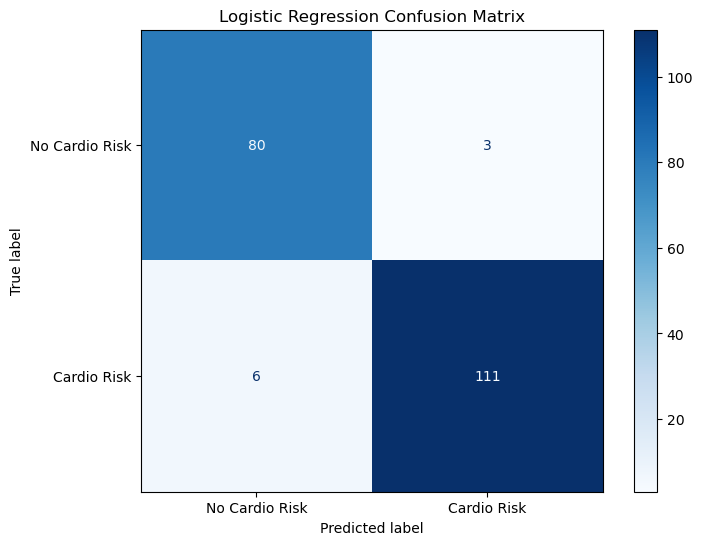

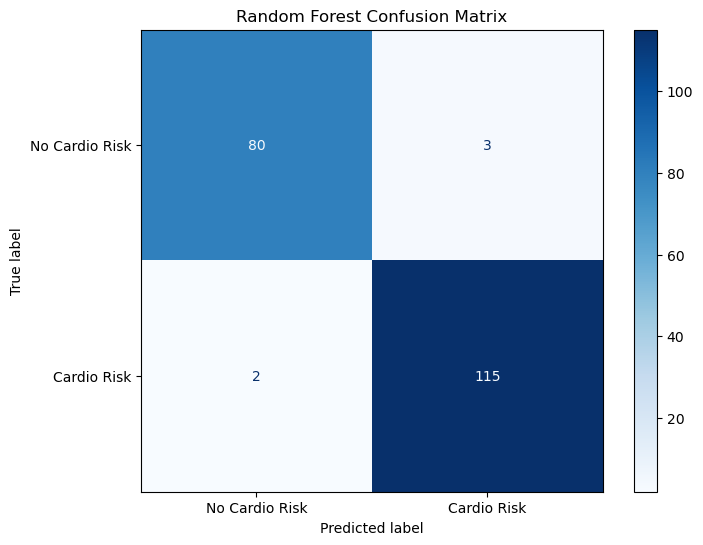

In [56]:
# --- Plot Confusion Matrix Heatmaps ---

# Logistic Regression Confusion Matrix
cm_log_reg = confusion_matrix(y_test, y_pred, labels=logreg_grid.best_estimator_.classes_)
disp_log_reg = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg, display_labels=['No Cardio Risk', 'Cardio Risk'])
fig_log_reg, ax_log_reg = plt.subplots(figsize=(8, 6))
disp_log_reg.plot(cmap='Blues', ax=ax_log_reg, values_format='d')
ax_log_reg.set_title('Logistic Regression Confusion Matrix')
plt.show()

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=grid_rf.best_estimator_.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['No Cardio Risk', 'Cardio Risk'])
fig_rf, ax_rf = plt.subplots(figsize=(8, 6))
disp_rf.plot(cmap='Blues', ax=ax_rf, values_format='d')
ax_rf.set_title('Random Forest Confusion Matrix')
plt.show()

### Base on the p-values, correlatin matrix and model feature idose not mportance
### we decide to drop age features which do not show significant relationship with target

